# Data Augmentation

## Import Libraries

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


## Check dataset

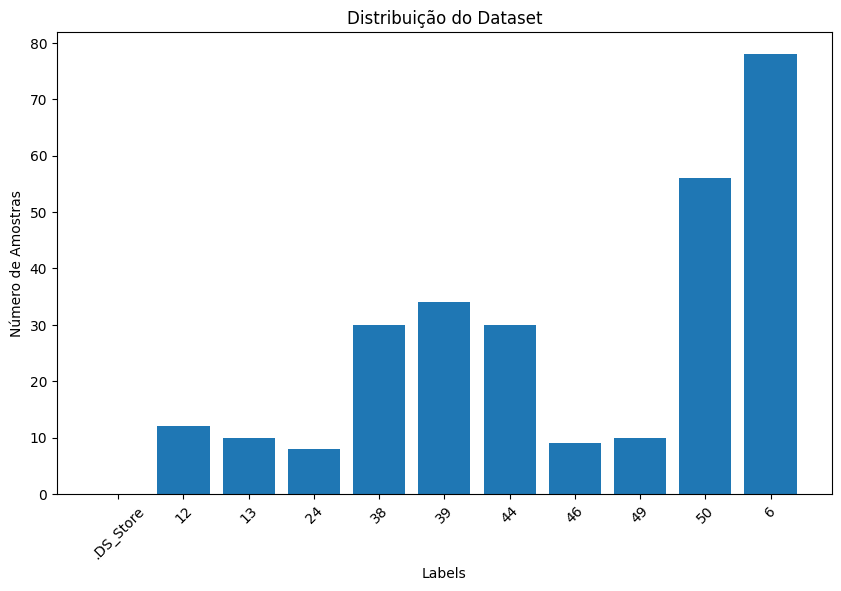

In [22]:
import os
import matplotlib.pyplot as plt

data_dir = 'data-students\\TRAIN'  # Substitua pelo caminho real do seu dataset

# Função para contar o número de arquivos de imagem em um diretório
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                count += 1
    return count

# Listar as pastas (labels) dentro do diretório data_dir
labels = os.listdir(data_dir)

# Contar o número de imagens em cada label
label_counts = {label: count_images(os.path.join(data_dir, label)) for label in labels}

# Plotar a distribuição
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Labels')
plt.ylabel('Número de Amostras')
plt.title('Distribuição do Dataset')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Labes to generate new images

labels = ["12", "13", "24", "38", "39", "44", "46", "49"]


## Processing

In [24]:
output_dir = 'data-augmented'  # Diretório de saída para imagens aumentadas
batch_size = 32
rotation_range = 20
zoom_range = 0.1
ciclos = 2

# Labels a serem consideradas para a data augmentation
labels = ["12", "13", "24", "38", "39", "44", "46", "49"]

# Criar o diretório de saída se não existir
os.makedirs(output_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=rotation_range,
    zoom_range=zoom_range,
    fill_mode='nearest'
)

for label in labels:
    # Encontrar as imagens na pasta da label atual
    image_paths = [os.path.join(data_dir, label, filename) for filename in os.listdir(os.path.join(data_dir, label))]

    # Criar um diretório para armazenar as imagens aumentadas e as originais
    output_subdir = os.path.join(output_dir, label)
    os.makedirs(output_subdir, exist_ok=True)

    # Iterar sobre as imagens e gerar imagens aumentadas
    for i, image_path in enumerate(image_paths):
        image = tf.keras.preprocessing.image.load_img(image_path)
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)

        # Salvar a imagem original
        image.save(os.path.join(output_subdir, f'original_{i}.jpeg'))

        # Gere imagens aumentadas e salve no diretório de saída
        for batch in datagen.flow(image_array, batch_size=batch_size, save_to_dir=output_subdir, save_prefix='aug', save_format='jpeg'):
            break  # Interrompe o loop após uma iteração


Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 24 aumentadas e salvas em data-augmented\24
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aumentadas e salvas em data-augmented\46
Imagens da label 46 aume